In [44]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Reference the file where the CSV and JSON's are located
education_csv = "Resources/Education.csv"
education_json = "Resources/json_education.json"
price_csv = "Resources/Housing_Price.csv"
price_json = "Resources/json_housing_price.json"
income_csv = "Resources/Income.csv"
higher_education_csv = "Resources/HigherEducation.csv"

# Import the data into a Pandas DataFrame
education1_df = pd.read_csv(education_csv)
education2_df = pd.read_json(education_json)
price1_df = pd.read_csv(price_csv)
price2_df = pd.read_json(price_json)
income_df = pd.read_csv(income_csv, on_bad_lines='skip')
HigherEd_df = pd.read_csv(higher_education_csv)

In [3]:
merge_csv1_df = pd.merge(education1_df, price1_df, on="state", how="outer")
merge_csv1_df["MedianValue"] = merge_csv1_df["MedianValue"]
merge_csv1_df["medianValueZillow"] = merge_csv1_df["medianValueZillow"]

In [4]:
merge_csv2_df = pd.merge(merge_csv1_df, HigherEd_df, on="state", how="outer")

In [5]:
merge_csv3_df = pd.merge(merge_csv2_df, income_df, on="state", how="outer")
merge_csv3_df["HouseholdIncome"] = merge_csv3_df["HouseholdIncome"]

In [6]:
State_df = merge_csv3_df.rename(columns={"state":"State", "publicSchoolScore":"School Score", "qualityRank":"School Quality Ranking", "safetyRank":"School Safety Ranking","MedianValue":"Median Home Value", "medianValueZillow":"Median Home Value on Zillow", "PercentHighSchoolOrHigher":"Percent of High School Graduates", "PercentBachelorsOrHigher":"Percent of High Education Graduates", "HouseholdIncome": "Average Income" })
State_df

,State,School Score,School Quality Ranking,School Safety Ranking,Median Home Value,Median Home Value on Zillow,Percent of High School Graduates,Percent of High Education Graduates,Average Income
0,Massachusetts,73.14,1,1,398800,559312,91.1,44.5,84385
1,Connecticut,67.50,2,9,279700,343687,90.9,40.0,79855
2,New Jersey,64.36,3,19,343500,441762,90.3,40.7,85245
3,Virginia,61.71,5,2,282800,358447,90.3,39.5,76398
4,New Hampshire,61.57,4,12,272300,411945,93.3,37.6,77923
5,Maryland,60.24,8,4,325400,390608,90.6,40.9,87063
6,Delaware,58.07,16,3,258300,337543,90.6,32.7,69110
7,Nebraska,57.81,12,8,164000,230672,91.6,32.5,63015
8,Wisconsin,57.48,6,28,189200,251655,92.6,30.8,63293
9,Vermont,57.43,15,6,230900,336310,93.5,39.7,63477


In [7]:
State_df["Region"]= 1

State_df.loc[(State_df["State"] == "Connecticut")|(State_df["State"] == "Maine")|(State_df["State"] == "Massachusetts")
             |(State_df["State"] == "New Hampshire")|(State_df["State"] == "Rhode Island")|(State_df["State"] == "Vermont"),"Region"] = "New England Division" 
State_df.loc[(State_df["State"] == "New Jersey")|(State_df["State"] == "New York")|(State_df["State"] == "Pennsylvania"),"Region"] = "Middle Atlantic Division"
State_df.loc[(State_df["State"] == "Illinois")|(State_df["State"] == "Indiana")|(State_df["State"] == "Michigan")
             |(State_df["State"] == "Ohio")|(State_df["State"] == "Wisconsin"),"Region"] = "East North Central Division"

State_df.loc[(State_df["State"] == "Iowa")|(State_df["State"] == "Kansas")|(State_df["State"] == "Minnesota")
             |(State_df["State"] == "Missouri")|(State_df["State"] == "Nebraska")|
             (State_df["State"] == "North Dakota")|(State_df["State"] == "South Dakota"),"Region"] = "West North Central Division"

State_df.loc[(State_df["State"] == "Delaware")|(State_df["State"] == "Florida")|(State_df["State"] == "Georgia")
             |(State_df["State"] == "Maryland")|(State_df["State"] == "North Carolina")|
             (State_df["State"] == "South Carolina")|(State_df["State"] == "Virginia")|(State_df["State"] == "West Virginia"),"Region"] = "South Atlantic Division"

State_df.loc[(State_df["State"] == "Alabama")|(State_df["State"] == "Kentucky")|(State_df["State"] == "Mississippi")
             |(State_df["State"] == "Tennessee"),"Region"] = "East South Central Division"

State_df.loc[(State_df["State"] == "Arkansas")|(State_df["State"] == "Louisiana")|(State_df["State"] == "Oklahoma")
             |(State_df["State"] == "Texas"),"Region"] = "West South Central Division"

State_df.loc[(State_df["State"] == "Arizona")|(State_df["State"] == "Colorado")|(State_df["State"] == "Idaho")
             |(State_df["State"] == "Montana")|(State_df["State"] == "Nevada")|
             (State_df["State"] == "New Mexico")|(State_df["State"] == "Utah")|(State_df["State"] == "Wyoming"),"Region"] = "West Region"

State_df.loc[(State_df["State"] == "Alaska")|(State_df["State"] == "California")|(State_df["State"] == "Hawaii")
             |(State_df["State"] == "Oregon")|(State_df["State"] == "Washington"),"Region"] = "Pacific Division"
State_df

bins2 = [20, 29,39,49]
group_labels = ["Graduates 20-29","Graduates 30-39","Graduates 40-49" ]
State_df["Graduate Bin"] = pd.cut(State_df["Percent of High Education Graduates"],bins2,labels=group_labels,include_lowest=True)
State_df

,State,School Score,School Quality Ranking,School Safety Ranking,Median Home Value,Median Home Value on Zillow,Percent of High School Graduates,Percent of High Education Graduates,Average Income,Region,Graduate Bin
0,Massachusetts,73.14,1,1,398800,559312,91.1,44.5,84385,New England Division,Graduates 40-49
1,Connecticut,67.50,2,9,279700,343687,90.9,40.0,79855,New England Division,Graduates 40-49
2,New Jersey,64.36,3,19,343500,441762,90.3,40.7,85245,Middle Atlantic Division,Graduates 40-49
3,Virginia,61.71,5,2,282800,358447,90.3,39.5,76398,South Atlantic Division,Graduates 40-49
4,New Hampshire,61.57,4,12,272300,411945,93.3,37.6,77923,New England Division,Graduates 30-39
5,Maryland,60.24,8,4,325400,390608,90.6,40.9,87063,South Atlantic Division,Graduates 40-49
6,Delaware,58.07,16,3,258300,337543,90.6,32.7,69110,South Atlantic Division,Graduates 30-39
7,Nebraska,57.81,12,8,164000,230672,91.6,32.5,63015,West North Central Division,Graduates 30-39
8,Wisconsin,57.48,6,28,189200,251655,92.6,30.8,63293,East North Central Division,Graduates 30-39
9,Vermont,57.43,15,6,230900,336310,93.5,39.7,63477,New England Division,Graduates 40-49


In [29]:
Graduates_df = State_df.groupby("Graduate Bin")
Graduates_df = Graduates_df.mean()
Graduates_df

cols2 = ["Median Home Value","Median Home Value on Zillow","Percent of High School Graduates",
"Percent of High Education Graduates","Average Income"]

Graduates_df = Graduates_df[cols2].round(2)
Graduates_df

,Median Home Value,Median Home Value on Zillow,Percent of High School Graduates,Percent of High Education Graduates,Average Income
Graduate Bin,,,,,
Graduates 20-29,171133.33,244065.40,88.24,26.26,54432.60
Graduates 30-39,252096.43,365088.96,90.69,32.83,66368.54
Graduates 40-49,318714.29,427137.71,91.26,40.99,78807.71


In [13]:
region_df = State_df.groupby("Region")
region_df = region_df.mean()
cols = ["Median Home Value", "Median Home Value on Zillow","Percent of High School Graduates", "Average Income",
        "Percent of High Education Graduates","School Score"]
region_df[cols]=region_df[cols].round(2)
region_df

,School Score,School Quality Ranking,School Safety Ranking,Median Home Value,Median Home Value on Zillow,Percent of High School Graduates,Percent of High Education Graduates,Average Income
Region,,,,,,,,
East North Central Division,52.08,21.000000,26.400000,170840.00,228107.40,90.74,30.48,61461.20
East South Central Division,44.09,36.250000,29.250000,149950.00,204481.25,86.90,25.55,51404.25
Middle Atlantic Division,57.88,11.000000,22.666667,285333.33,359674.00,89.50,36.83,73329.67
New England Division,62.29,8.833333,7.500000,276050.00,401457.17,91.87,38.22,72572.33
Pacific Division,42.84,38.600000,31.400000,430800.00,604132.20,90.46,33.88,76461.60
South Atlantic Division,50.62,25.750000,18.750000,220512.50,304260.62,89.04,32.26,63880.12
West North Central Division,52.80,18.428571,31.285714,178471.43,242654.86,92.11,31.77,63117.86
West Region,45.28,32.625000,33.500000,261462.50,429635.88,90.66,31.28,63125.12
West South Central Division,41.06,41.750000,30.750000,157825.00,209198.00,86.52,26.38,54485.25


Text(0, 0.5, 'Average Home Value')

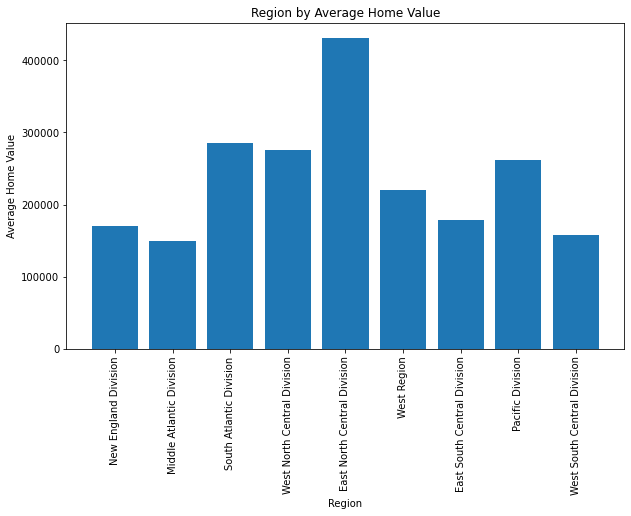

In [43]:
x1_axis = State_df["Region"].unique()
y1_axis = region_df["Median Home Value"]
plt.figure(figsize=(10,6))
plt.bar(x1_axis,y1_axis,align="center")
tick_locations = [value for value in x1_axis]
plt.xticks(tick_locations,rotation='vertical')
plt.title("Region by Average Home Value")
plt.xlabel("Region")
plt.ylabel("Average Home Value")

Region by Average Income

The graph shows the average income by region.  The regions are breakdown by a list of states that can be found on the Census (https://www.census.gov/programs-surveys/economic-census/guidance-geographies/levels.html).  Each region provides what the current average income is leaving in the various region.


Text(0, 0.5, 'Average Income')

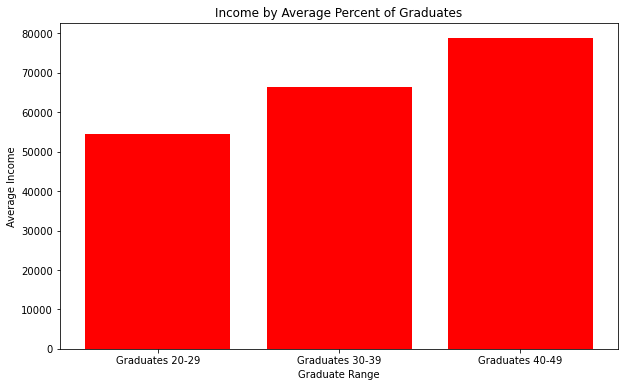

In [70]:
x_axis = State_df["Graduate Bin"].unique()
x_axis =list(x_axis)
x_axis.sort(reverse=False)
y_axis = Graduates_df["Average Income"]

plt.figure(figsize=(10,6))

plt.bar(x_axis,y_axis,align="center",color="r")
plt.title("Income by Average Percent of Graduates")
plt.xlabel("Graduate Range")
plt.ylabel("Average Income")


Income by Average Percentage of Graduates 

The graph average income based on the percentage of graduates among the states.  The lower percentage of people with graduate degrees in specific states represent a lower income level.  The higher percentage of people with graduate degree represent a higher income percentage.

Text(55000, 500000, 'y = 7.58x + -252209.41')

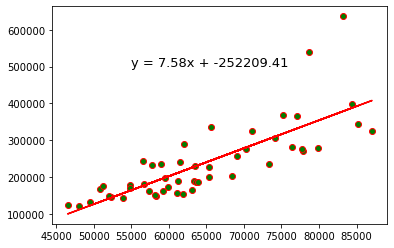

In [57]:
x2 = State_df["Average Income"]
y2 = State_df["Median Home Value"]
(slope,intercept,rvalue,pvalue,stderr )=linregress(x2,y2)
regress_values = x2*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2, y2, marker='o',facecolors="green",edgecolors="red")
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(55000,500000),fontsize =13,color ="black")